# Imports

In [1]:
import numpy as np
np.random.seed(2)
import random
random.seed(1)

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from importances import importances

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.metrics import mean_squared_error

In [4]:
if not os.path.exists('results'):
    os.makedirs('results')

# Random Forest 

In [5]:
clf = RandomForestRegressor(random_state=2)
clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [6]:
train = pd.read_csv('../feature_engineering/train.gz')
X_train = train[train.columns[:-1]].values
y_train = train[train.columns[-1]].values

In [7]:
test = pd.read_csv('../feature_engineering/test.gz')
X_test = test[test.columns[:-1]].values
y_test = test[test.columns[-1]].values

## Grid Search

In [8]:
cv = KFold(n_splits=3, shuffle=True, random_state=2)
cv

KFold(n_splits=3, random_state=2, shuffle=True)

In [9]:
params = {
    "n_estimators": [1 + 2*x for x in range(1, 12)],
    "max_features": ["sqrt", "log2", None],
    "max_depth": [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_leaf_nodes": [2, 5, 10, 50, 100, None],
    "min_impurity_decrease": [0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4],
    "bootstrap": [True, False],
}

In [10]:
grid = EvolutionaryAlgorithmSearchCV(
    estimator=clf, 
    params=params, 
    cv=cv, 
    scoring='neg_mean_squared_error',
    n_jobs=4, 
    population_size=10,
    gene_mutation_prob=0.10,
    gene_crossover_prob=0.5,
    tournament_size=3,
    generations_number=15,
    verbose=1,
)
grid

EvolutionaryAlgorithmSearchCV(cv=KFold(n_splits=3, random_state=2, shuffle=True),
               error_score='raise',
               estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
               fit_params={}, gene_crossover_prob=0.5,
               gene_mutation_prob=0.1, gene_type=None,
               generations_number=15, iid=True, n_jobs=4,
               params={'n_estimators': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 'max_features': ['sqrt', 'log2', None], 'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_leaf_nodes': [2,

In [11]:
_ = grid.fit(X_train, y_train)

Types [1, 1, 1, 1, 1, 1, 1, 1] and maxint [10, 2, 11, 8, 8, 5, 6, 1] detected
--- Evolve in 2694384 possible combinations ---
gen	nevals	avg     	min    	max     	std   
0  	10    	-68.2402	-191.77	-26.9817	45.328
1  	7     	-51.1072	-101.632	-26.9817	18.3547
2  	6     	-42.0329	-47.0249	-26.9817	5.52696
3  	9     	-37.111 	-43.2683	-26.9817	6.67615
4  	8     	-31.152 	-40.8828	-26.9817	6.37029
5  	8     	-29.5294	-40.8828	-26.9817	5.12199
6  	3     	-26.9817	-26.9817	-26.9817	0      
7  	8     	-30.3333	-60.4981	-26.9817	10.0549
8  	5     	-34.6203	-103.368	-26.9817	22.916 
9  	7     	-27.1629	-28.7936	-26.9817	0.543586
10 	6     	-26.9817	-26.9817	-26.9817	0       
11 	6     	-26.9817	-26.9817	-26.9817	0       
12 	5     	-26.9817	-26.9817	-26.9817	0       
13 	4     	-26.9817	-26.9817	-26.9817	0       
14 	6     	-27.0126	-27.2906	-26.9817	0.0926803
15 	3     	-26.9817	-26.9817	-26.9817	0        
Best individual is: {'n_estimators': 17, 'max_features': 'sqrt', 'max_depth': None, 'mi

In [12]:
best = pd.Series(grid.best_params_)
best.to_csv('results/rf-params.csv')
best

bootstrap                False
max_depth                 None
max_features              sqrt
max_leaf_nodes            None
min_impurity_decrease    0.001
min_samples_leaf             8
min_samples_split            8
n_estimators                17
dtype: object

In [13]:
results = grid.cv_results_
df = pd.DataFrame(results)
df.to_csv('results/rf-grid.csv')
df

,index,max_test_score,mean_test_score,min_test_score,nan_test_score?,param_index,params,std_test_score
0,11,-36.249444,-36.249444,-36.249444,False,0,"{'n_estimators': 17, 'max_features': 'log2', '...",0.0
1,12,-47.024934,-47.024934,-47.024934,False,0,"{'n_estimators': 11, 'max_features': None, 'ma...",0.0
2,13,-47.024934,-47.024934,-47.024934,False,0,"{'n_estimators': 11, 'max_features': 'log2', '...",0.0
3,14,-47.024934,-47.024934,-47.024934,False,0,"{'n_estimators': 11, 'max_features': 'log2', '...",0.0
4,15,-47.024934,-47.024934,-47.024934,False,0,"{'n_estimators': 11, 'max_features': 'log2', '...",0.0
5,16,-36.249444,-36.249444,-36.249444,False,0,"{'n_estimators': 17, 'max_features': None, 'ma...",0.0
6,17,-56.824718,-56.824718,-56.824718,False,0,"{'n_estimators': 15, 'max_features': None, 'ma...",0.0
7,19,-47.024934,-47.024934,-47.024934,False,0,"{'n_estimators': 11, 'max_features': 'log2', '...",0.0
8,20,-47.024934,-47.024934,-47.024934,False,0,"{'n_estimators': 11, 'max_features': 'log2', '...",0.0
9,21,-47.024934,-47.024934,-47.024934,False,0,"{'n_estimators': 11, 'max_features': 'log2', '...",0.0


# Testing

In [14]:
clf = RandomForestRegressor(**grid.best_params_)
clf

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.001, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.001, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

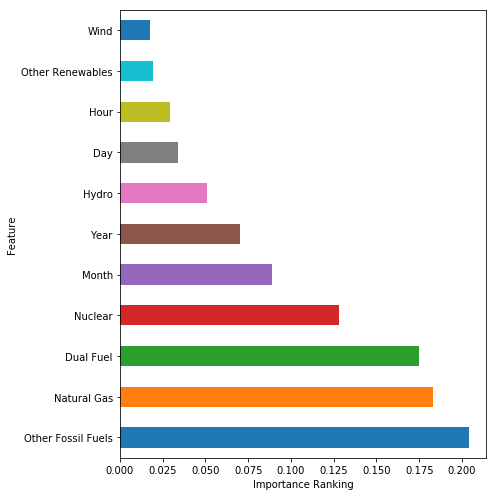

In [16]:
_ = importances(clf, train[train.columns[:-1]])
plt.savefig('results/rf-importances.pdf')
plt.savefig('results/rf-importances.svg')

## Training Accuracy

In [17]:
train_pred = clf.predict(X_train)

In [18]:
train_err = mean_squared_error(y_train, train_pred)
train_err

11.089931058661351

In [19]:
train_df = pd.DataFrame([y_train, train_pred], index=['Truth', 'Predictions']).T

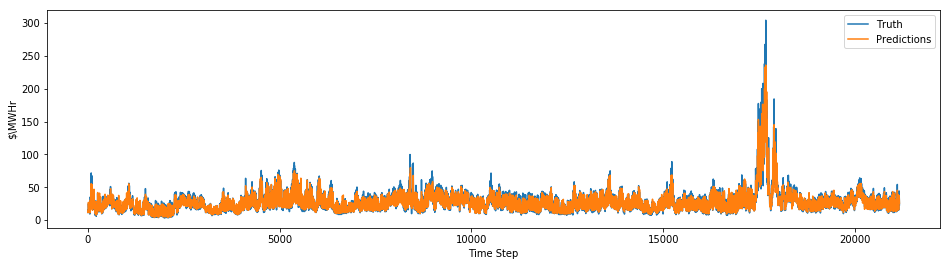

In [20]:
ax = train_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/rf-train.pdf')
plt.savefig('results/rf-train.svg')

## Testing Accuracy

In [21]:
test_pred = clf.predict(X_test)

In [22]:
test_err = mean_squared_error(y_test, test_pred)
test_err

44.33717375610266

In [23]:
test_df = pd.DataFrame([y_test, test_pred], index=['Truth', 'Predictions']).T

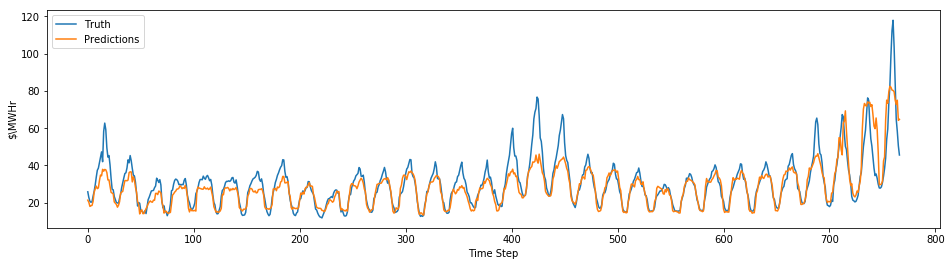

In [24]:
ax = test_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/rf-test.pdf')
plt.savefig('results/rf-test.svg')

## Results

In [25]:
results = pd.Series([train_err, test_err], index=['Train', 'Test'])
results

Train    11.089931
Test     44.337174
dtype: float64

In [26]:
results.to_csv('results/rf-mse.csv')